In [1]:
from utils import *

In [2]:
account_name = '396255466#1'
path_live = f"/Applications/World of Warcraft/_classic_/WTF/Account/{account_name}/SavedVariables/Auc-ScanData.lua" 

with open(path_live, 'r') as f:
    ac = lua.decode('{'+f.read()+'}')

In [10]:
auction_data = []

for rope in ac['AucScanData']['scans']['Grobbulus']['ropes']:
    auctions = rope[9:-3].split('},{')
    for auction in auctions:
        auction_data.append(auction.split('|')[-1].split(','))
        
# Contains lots of columns, we ignore ones we likely dont care about
# We apply transformations and relabel
df = pd.DataFrame(auction_data)
df['item'] = df[8].str.replace('"','')
df['count'] = df[10].replace('nil', 0).astype(int)
df['price'] = df[16].astype(int)
df['agent'] = df[19].str.replace('"','')
df['timestamp'] = df[7].apply(lambda x: dt.fromtimestamp(int(x)))

# There is some timing difference in the timestamp, we dont really care we just need time of pull
df['timestamp'] = df['timestamp'].max()

df = df[df['count']>0]
df['price_per'] = df['price'] / df['count']

cols = ["timestamp", "item", "count", "price", "agent", "price_per"]
df = df[cols]

In [7]:
user_items = load_items()

In [31]:
df_relevant = df[df['item'].isin(user_items.keys())]

In [36]:
df_relevant.sort_values(['item','price_per','count'])

,item,count,price,agent,price_per
23505,Arcane Crystal,1,626900,Racateria,626900.0
19443,Arcane Crystal,1,627000,Vhos,627000.0
24341,Arcane Crystal,1,627900,Lockurheart,627900.0
21690,Arcane Crystal,1,627949,Suukokku,627949.0
21269,Arcane Crystal,1,627999,Sivart,627999.0
...,...,...,...,...,...
6156,Winter Squid,1,18000,Homage,18000.0
6157,Winter Squid,1,18000,Homage,18000.0
1715,Winter Squid,1,19900,Avarita,19900.0
9138,Winter Squid,20,399140,Annafoxlove,19957.0


In [10]:
{item: details.get('label') for item, details in user_items.items()}

{'Arcane Crystal': None,
 'Arcane Elixir': None,
 'Arcanite Bar': None,
 'Blackmouth Oil': None,
 'Blinding Powder': None,
 'Blindweed': None,
 'Crippling Poison II': None,
 'Dense Sharpening Stones': None,
 'Dream Dust': None,
 'Dreamfoil': None,
 'Elemental Sharpening Stone': None,
 'Elixir of Fortitude': None,
 'Elixir of Giants': None,
 'Elixir of Greater Agility': None,
 'Elixir of Greater Intellect': None,
 'Tender Wolf Meat': None,
 "Khadgar's Whiskers": None,
 'Swiftthistle': None,
 'Briarthorn': None,
 'Winter Squid': None,
 'Elixir of Shadow Power': None,
 'Elixir of Superior Defense': None,
 'Elixir of the Mongoose': None,
 'Essence of Undead': None,
 'Essence of Water': None,
 'Fadeleaf': None,
 'Fire Oil': None,
 'Fire Protection Potion': None,
 'Firefin Snapper': None,
 'Flash Powder': None,
 'Free Action Potion': None,
 'Ghost Mushroom': None,
 'Goldthorn': None,
 'Grave Moss': None,
 'Greater Arcane Protection Potion': None,
 'Greater Eternal Essence': None,
 'Greater S

In [11]:
generate_inventory(verbose=True)
generate_auction_history(verbose=True)
generate_historic_average_prices()

Total Monies: 930.10
Saving inventory data with (114, 6) shape
15677 auction events
12694 auction events of interest


In [12]:
get_character_needs(['Melue', 'Zegna'])

{'Melue': {'Elemental Sharpening Stone': -2,
  'Heavy Runecloth Bandage': -6,
  'Thistle Tea': -9},
 'Zegna': {'Elemental Sharpening Stone': -1,
  'Heavy Runecloth Bandage': -4,
  'Swiftness Potion': -2}}

In [13]:
get_character_needs(['Amazoni'])

{'Amazoni': {'Elixir of Giants': -33,
  'Fire Protection Potion': -30,
  'Greater Arcane Protection Potion': -15,
  'Limited Invulnerability Potion': -35,
  'Mighty Rage Potion': -36}}

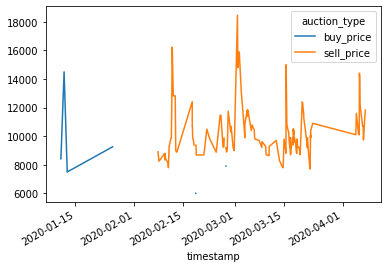

In [14]:
get_profits(item='Elixir of Giants')

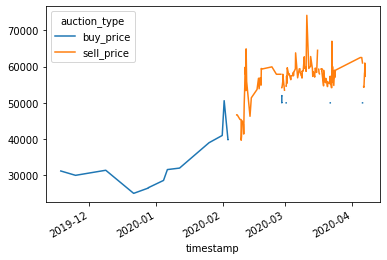

In [15]:
get_profits(item='Elixir of the Mongoose')

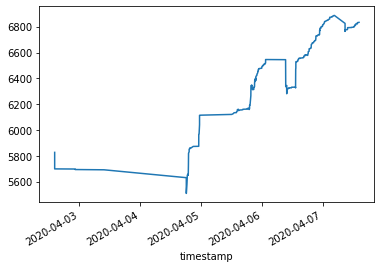

In [16]:
get_profits(date='2020-04-01')

In [17]:
generate_market_average_prices()

In [18]:
generate_item_sell_prices()

In [19]:
prices = pd.read_parquet('intermediate/sell_prices.parquet')

In [20]:
#80 * # Thorium ore 
12 + (12 * 85) + (40 * 0.08) + 50 + 8 + 100
#Arcanite bar 
#10 # Blue sapphire
#4 # Azerothian Diamond

1193.2

In [21]:
12*85

1020

In [24]:
prices['min_list_price']

item
Arcane Elixir                        8500
Elixir of Fortitude                  9000
Elixir of Giants                     9000
Elixir of Greater Agility            8600
Elixir of Greater Intellect          5900
Elixir of Shadow Power              28400
Elixir of Superior Defense          10600
Elixir of the Mongoose              57200
Fire Protection Potion              11900
Free Action Potion                  12100
Greater Arcane Protection Potion     9100
Greater Stoneshield Potion           9900
Invisibility Potion                 14900
Limited Invulnerability Potion      19100
Mighty Rage Potion                  11000
Swiftness Potion                     6300
Name: min_list_price, dtype: int64

In [23]:
prices['lower_price'] = prices['buy_price'].fillna(prices['sell_price'])
prices['upper_price'] = prices['sell_price'].fillna(prices['buy_price'])

KeyError: 'buy_price'

In [ ]:
prices = ((prices['upper_price'] + prices['lower_price']) / 2).dropna()

In [ ]:
prices = pd.read_parquet('intermediate/sell_prices.parquet')

In [ ]:
prices[['gross_profit', 'auction_success']].dropna()

In [ ]:
prices['ingredient_value'] = prices['gross_profit'] * prices['auction_success']

In [ ]:
user_items = load_items()

In [ ]:
ingredient_df = pd.DataFrame()
for item, details in user_items.items():
    if details.get('made_from'):
        for ingredient, count in details.get('made_from').items():
            ingredient_df.loc[item, ingredient] = count
        
# xs = ingredient_df.drop(['Crystal Vial', 'Leaded Vial', 'Empty Vial'], axis=1).fillna(0).astype(int)
# ys = ingredient_raw['ingredient_value']

In [ ]:
ingredient_raw

In [ ]:
def update_beta(pred_beta, y, x, learning_rate=0.02):
    actual_value = y * (x / x.sum())
    actual_value = actual_value[actual_value>0]

    new_beta = pred_beta.copy()
    new_beta.update(actual_value)

    # Introduce some truthiness to the betas
    pred_beta += ((new_beta - pred_beta) * learning_rate)
    return pred_beta

In [ ]:
import numpy as np

In [ ]:
random_start = ((np.random.rand(len(xs.columns)) - 0.5) + 1) * ys.mean()

In [ ]:
pred_beta = pd.Series(random_start, index=xs.columns)

In [ ]:
all_betas = pd.DataFrame(columns=pred_beta.index)

for i in range(800):
    for item, y in ys.sample(10).items():
        x = xs.loc[item]
        pred_beta = update_beta(pred_beta, y, x, learning_rate=0.005)
        
        if verbose:
            beta_proportion = ((pred_beta / pred_beta.sum()))
            all_betas.loc[i] = beta_proportion
if verbose:
    all_betas.plot(legend=False)
            
beta_proportion = ((pred_beta / pred_beta.sum()))            
beta_proportion.sort_values()         

In [ ]:
pred_beta

In [ ]:
# Need a POPULARITY metric, something that signifies how many of the last x auctions have been item

In [ ]:
def analyse_stocktake_value(excluded_characters=[]):
    df = pd.read_parquet('intermediate/inventory.parquet')

    item_count = df.groupby('item')['count'].sum()
    items = load_items()
    # Adjust for self demand
    for item, detail in items.items():
        if 'self_demand' in detail:
            for character, count in detail['self_demand'].items():
                if character not in excluded_characters:
                    if item in item_count.index:
                        item_count.loc[item] -= count

    ####

    # Get prices from below
    prices.name = 'price'
    stocktake = pd.DataFrame(item_count).join(prices)
    stocktake['est'] = stocktake['count'] * stocktake['price']
    print(int(stocktake['est'].sum() / 10000))                
    
    
analyse_stocktake_value(excluded_characters=['Amazoni'])    